In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling   

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

C:\Users\Sony\Anaconda4\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Sony\Anaconda4\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Sony\Anaconda4\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Sony\Anaconda4\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Sony\Anaconda4\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Sony\Anaconda4\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Users\Sony\Anac

In [2]:
cc = pd.read_csv('C:\\Users\\Sony\\Downloads\\BA classes\\class 20 - final assign\\4. CREDIT CARD CASE STUDY - SEGMENTATION\\CC GENERAL.csv')
cc.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [6]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [7]:
cc.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [9]:
pandas_profiling.ProfileReport(cc)

Number of variables,18
Number of observations,8950
Total Missing (%),0.2%
Total size in memory,1.2 MiB
Average record size in memory,144.0 B
Numeric,16
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,1


In [3]:
numeric_var_names=[key for key in dict(cc.dtypes) if dict(cc.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(cc.dtypes) if dict(cc.dtypes)[key] in ['object']]
print (numeric_var_names)
print (cat_var_names)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
['CUST_ID']


In [4]:
cc_num=cc[numeric_var_names]
cc_num.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
cc_num.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [5]:
cc_cat=cc[cat_var_names]
cc_cat.head(5)

,CUST_ID
0,C10001
1,C10002
2,C10003
3,C10004
4,C10005


In [6]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=cc_num.apply(lambda x: var_summary(x)).T

In [10]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.13856
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.57000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.00000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.21176
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.50000


In [7]:
#Handling Outliers
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

cc_num=cc_num.apply(lambda x: outlier_capping(x))

In [26]:
cc.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [8]:
#Handling missings
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

cc_num=cc_num.apply(lambda x: Missing_imputation(x))

In [19]:
cc_num.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [13]:
cc.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


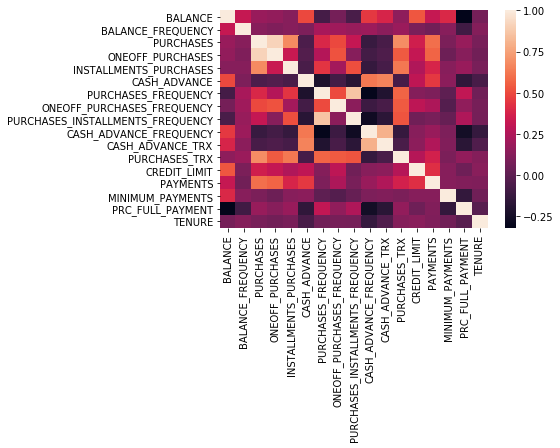

In [9]:
sns.heatmap(cc.corr())

### Standardise the data

In [10]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

In [11]:
sc=StandardScaler()

cc_scaled=sc.fit_transform(cc_num)
cc_scaled

array([[-0.76285553, -0.25596817, -0.55132729, ..., -0.49991713,
        -0.52555097,  0.36067954],
       [ 0.84486711,  0.13250091, -0.61388057, ...,  0.24290272,
         0.2342269 ,  0.36067954],
       [ 0.48518086,  0.52096999, -0.10691708, ..., -0.11149825,
        -0.52555097,  0.36067954],
       ...,
       [-0.7717557 , -0.19122546, -0.51919825, ..., -0.54537945,
         0.32919999, -4.12276757],
       [-0.77681097, -0.19122546, -0.61388057, ..., -0.56661119,
         0.32919999, -4.12276757],
       [-0.59412458, -0.90341664,  0.10295769, ..., -0.54070466,
        -0.52555097, -4.12276757]])

In [12]:
pd.DataFrame(cc_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,4.872701e-16,7.328750e-15,-1.813117e-15,-7.236223e-15,5.149698e-16,-4.228126e-15,-3.716084e-16,2.021052e-15,2.353921e-16,-6.906456e-16,-6.159877e-16,2.936385e-15,-9.725678e-16,2.169959e-16,4.538889e-17,-2.201566e-15,1.556446e-14
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.836213e-01,-3.363725e+00,-6.138806e-01,-4.891213e-01,-5.685883e-01,-5.270790e-01,-1.221758e+00,-6.786608e-01,-9.169952e-01,-6.853706e-01,-5.575046e-01,-6.751297e-01,-1.119281e+00,-7.325733e-01,-5.954623e-01,-5.255510e-01,-4.122768e+00
25%,-7.184204e-01,4.617444e-02,-5.878921e-01,-4.891213e-01,-5.685883e-01,-5.270790e-01,-1.014125e+00,-6.786608e-01,-9.169952e-01,-6.853706e-01,-5.575046e-01,-6.274220e-01,-8.094978e-01,-5.623451e-01,-4.749546e-01,-5.255510e-01,3.606795e-01
50%,-3.395198e-01,5.209700e-01,-3.769912e-01,-4.544767e-01,-4.369770e-01,-5.270790e-01,2.404259e-02,-3.993193e-01,-4.976286e-01,-6.853706e-01,-5.575046e-01,-3.411760e-01,-4.152279e-01,-3.519892e-01,-3.437465e-01,-5.255510e-01,3.606795e-01
75%,2.609187e-01,5.209700e-01,1.140258e-01,3.729876e-02,1.244232e-01,1.001874e-01,1.062211e+00,3.269728e-01,9.701506e-01,4.510881e-01,1.666850e-01,1.359008e-01,5.704468e-01,1.117962e-01,1.704864e-02,-3.712234e-02,3.606795e-01
max,3.965323e+00,5.209700e-01,5.272481e+00,5.610058e+00,5.178305e+00,4.872650e+00,1.269843e+00,2.673451e+00,1.599199e+00,3.576352e+00,4.692870e+00,4.883292e+00,3.527471e+00,5.311600e+00,6.582911e+00,2.893453e+00,3.606795e-01


### Applying PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
pc = PCA(n_components=17)

In [15]:
pc.fit(cc_scaled)

#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

In [16]:
var

array([0.2932927 , 0.21929602, 0.08644934, 0.07513249, 0.06263558,
       0.05475814, 0.04469969, 0.03797798, 0.03381939, 0.02604556,
       0.01795514, 0.01504022, 0.01226087, 0.01126959, 0.0061892 ,
       0.00243715, 0.00074094])

In [17]:
var1

array([29.33, 51.26, 59.9 , 67.41, 73.67, 79.15, 83.62, 87.42, 90.8 ,
       93.4 , 95.2 , 96.7 , 97.93, 99.06, 99.68, 99.92, 99.99])

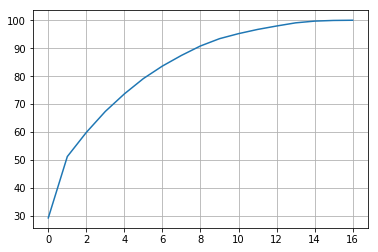

In [18]:
plt.plot(var1)

#### For the accuracy 70 - 80 % ,we need number of components to be 3 to 5

In [19]:
pc_final=PCA(n_components=5).fit(cc_scaled)

reduced_cr=pc_final.fit_transform(cc_scaled)

In [19]:
pd.DataFrame(reduced_cr).head(5)

,0,1,2,3,4
0,-1.764253,-1.423577,0.220600,-0.688821,-0.040324
1,-1.536339,2.705609,0.593655,0.313680,1.306637
2,1.033585,-0.291647,0.918084,-1.494286,-1.547439
3,-0.808836,-0.127441,1.504095,-1.220580,0.498063
4,-1.714508,-0.987010,0.230606,-1.046858,-0.460535


In [20]:
col_list=cc_num.columns

In [37]:
col_list

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

### Loadings matrix

In [21]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=cc_num.columns).T
Loadings

,0,1,2,3,4
BALANCE,0.143632,0.805719,-0.158170,-0.303732,0.051966
BALANCE_FREQUENCY,0.263343,0.296143,-0.403887,-0.191306,-0.523066
PURCHASES,0.905831,0.101717,0.226318,-0.019899,-0.024793
ONEOFF_PURCHASES,0.753813,0.134463,0.485889,-0.097000,-0.208289
INSTALLMENTS_PURCHASES,0.758140,-0.013615,-0.290716,0.128915,0.251984
CASH_ADVANCE,-0.150873,0.820644,-0.002117,0.290349,0.114291
PURCHASES_FREQUENCY,0.761087,-0.265882,-0.375239,0.177993,-0.123449
ONEOFF_PURCHASES_FREQUENCY,0.679089,0.035238,0.372975,-0.073438,-0.423867
PURCHASES_INSTALLMENTS_FREQUENCY,0.648569,-0.253933,-0.598764,0.232350,0.099326
CASH_ADVANCE_FREQUENCY,-0.255923,0.797498,-0.071114,0.335532,-0.198710


In [21]:
Loadings.to_csv("load.csv")

### Clustering

In [22]:
list_var = ['CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','PRC_FULL_PAYMENT','TENURE','BALANCE','PURCHASES','CASH_ADVANCE']# Handpicked variables

In [23]:
cc_scaled1=pd.DataFrame(cc_scaled, columns=cc_num.columns)
cc_scaled1.head(5)

cc_scaled2=cc_scaled1[list_var]
cc_scaled2.head(5)

,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE,PURCHASES,CASH_ADVANCE
0,-0.557505,-0.579714,-0.978471,-0.642945,-0.525551,0.36068,-0.762856,-0.551327,-0.527079
1,0.166685,-0.675130,0.711257,1.089747,0.234227,0.36068,0.844867,-0.613881,3.101370
2,-0.557505,-0.102638,0.852068,-0.456289,-0.525551,0.36068,0.485181,-0.106917,-0.527079
3,-0.376457,-0.627422,0.852068,-0.732573,-0.525551,0.36068,0.063882,0.369006,-0.411186
4,-0.557505,-0.627422,-0.922146,-0.431298,-0.525551,0.36068,-0.367830,-0.603389,-0.527079


In [25]:
cc_scaled2=cc_scaled1[list_var]
cc_scaled2.head(5)

,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE,PURCHASES,CASH_ADVANCE
0,-0.557505,-0.579714,-0.978471,-0.642945,-0.525551,0.36068,-0.762856,-0.551327,-0.527079
1,0.166685,-0.675130,0.711257,1.089747,0.234227,0.36068,0.844867,-0.613881,3.101370
2,-0.557505,-0.102638,0.852068,-0.456289,-0.525551,0.36068,0.485181,-0.106917,-0.527079
3,-0.376457,-0.627422,0.852068,-0.732573,-0.525551,0.36068,0.063882,0.369006,-0.411186
4,-0.557505,-0.627422,-0.922146,-0.431298,-0.525551,0.36068,-0.367830,-0.603389,-0.527079


In [24]:
from sklearn.cluster import KMeans

In [27]:
km_3=KMeans(n_clusters=3,random_state=123)

In [28]:
km_3.fit(cc_scaled2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [29]:
pd.Series(km_3.labels_).value_counts()

0    6746
1    1279
2     925
dtype: int64

In [47]:
km_4=KMeans(n_clusters=4,random_state=123).fit(cc_scaled2)

km_5=KMeans(n_clusters=5,random_state=123).fit(cc_scaled2)


In [31]:
# save the cluster labels and sort by cluster
cc_num['cluster_3'] = km_3.labels_
cc_num['cluster_4'] = km_4.labels_
cc_num['cluster_5'] = km_5.labels_

In [32]:
cc_num.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_3,cluster_4,cluster_5
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0,1,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,1,3,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0,1,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,767.303879,0.000000,12.0,0,1,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0,1,1


In [33]:
pd.Series.sort_index(cc_num.cluster_3.value_counts())

0    6746
1    1279
2     925
Name: cluster_3, dtype: int64

In [34]:
size=pd.concat([pd.Series(cc_num.cluster_3.size), pd.Series.sort_index(cc_num.cluster_3.value_counts()), pd.Series.sort_index(cc_num.cluster_4.value_counts()),
           pd.Series.sort_index(cc_num.cluster_5.value_counts())])

In [31]:
size

0    8950
0    6746
1    1279
2     925
0     705
1    6203
2     869
3    1173
0    1213
1    5303
2     676
3    1133
4     625
dtype: int64

In [35]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/cc_num.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,2,3,4
Seg_size,8950,6746,1279,925,705,6203,869,1173,1213,5303,676,1133,625


In [36]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,2,3,4
Seg_Pct,1.0,0.753743,0.142905,0.103352,0.078771,0.693073,0.097095,0.131061,0.135531,0.592514,0.075531,0.126592,0.069832


In [37]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([cc_num.apply(lambda x: x.mean()).T, cc_num.groupby('cluster_3').apply(lambda x: x.mean()).T, cc_num.groupby('cluster_4').apply(lambda x: x.mean()).T,
          cc_num.groupby('cluster_5').apply(lambda x: x.mean()).T], axis=1)

Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',]

In [35]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,KM5_3,KM5_4,KM5_5
Seg_size,8950.000000,6746.000000,1279.000000,925.000000,705.000000,6203.000000,869.000000,1173.000000,1213.000000,5303.000000,676.000000,1133.000000,625.000000
Seg_Pct,1.000000,0.753743,0.142905,0.103352,0.078771,0.693073,0.097095,0.131061,0.135531,0.592514,0.075531,0.126592,0.069832
BALANCE,1541.046707,890.648651,4423.257055,2299.142108,786.651200,935.321487,2386.553183,4571.240433,120.636749,1126.486864,819.469240,4630.555926,2995.031584
BALANCE_FREQUENCY,0.878083,0.851018,0.954944,0.969195,0.782810,0.860326,0.971312,0.960183,0.819003,0.873677,0.782833,0.960631,0.983515
PURCHASES,936.229237,545.124520,523.364550,4359.414486,422.487092,570.365954,4483.902704,551.497707,1149.137708,530.829502,411.297855,570.692286,5193.163312
ONEOFF_PURCHASES,536.493774,281.961199,315.433165,2698.454065,242.806879,293.998360,2778.383866,334.486802,539.093339,296.842225,245.942737,343.357501,3229.221440
INSTALLMENTS_PURCHASES,384.498368,263.454302,206.086060,1513.960653,180.105745,276.624333,1549.127139,214.998824,609.199803,234.270811,165.798905,225.251669,1748.276355
CASH_ADVANCE,935.920972,381.866427,4256.671587,385.014946,963.173586,363.098352,387.599161,4354.929733,65.917823,432.336910,1000.282427,4427.052080,498.897312
PURCHASES_FREQUENCY,0.490351,0.466477,0.298730,0.929414,0.432891,0.469614,0.932681,0.306848,0.748196,0.424435,0.420997,0.315160,0.941799
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.152717,0.137237,0.655397,0.125039,0.158127,0.662969,0.142255,0.271188,0.152598,0.121635,0.145418,0.682936


In [36]:
Profling_output_final.to_csv('Profiling output cs .csv')

### Finding number of optimum clusters

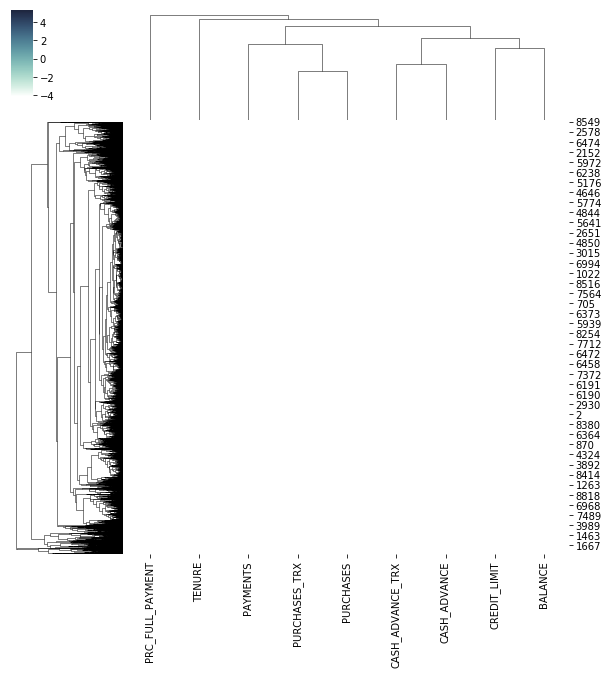

In [38]:
# Dendogram
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sns.clustermap(cc_scaled2, cmap=cmap, linewidths=.5)

### From Dendograms, we have 5 distinct cluster

### Elbow Analysis

In [38]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( cc_scaled2 )
    cluster_errors.append( clusters.inertia_ )

In [39]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,80550.000000
1,2,62869.228423
2,3,51345.636718
3,4,44297.150248
4,5,38045.155534
5,6,34867.265784
6,7,32239.738550
7,8,30288.927510
8,9,28535.739752
9,10,27239.920560


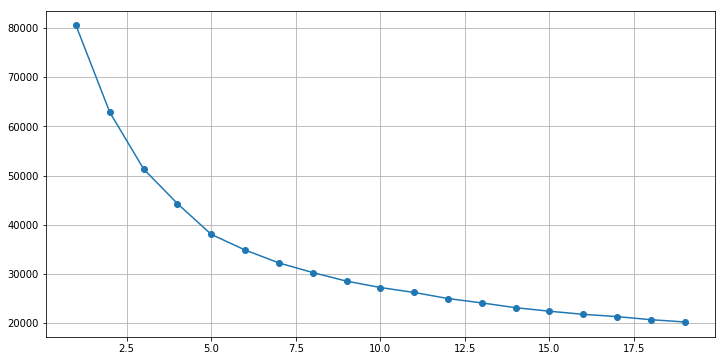

In [40]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )# here i think it is 5 cluster

### The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4 to 5. So, optimal number of clusters could either 4 or 5.
### The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

### Silhouette Coefficient

In [41]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(cc_scaled2, km_3.labels_)

0.3925930104297341

In [42]:
# calculate SC for K=3 through K=12
k_range = range(3, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(cc_scaled2)
    scores.append(metrics.silhouette_score(cc_scaled2, km.labels_))

In [43]:
scores

[0.3925930104297341,
 0.3731728696401887,
 0.33983940213093056,
 0.3173310923621895,
 0.2999993708191477,
 0.2926674879986587,
 0.28069803207412314,
 0.26440348548874504,
 0.2667518058036561]

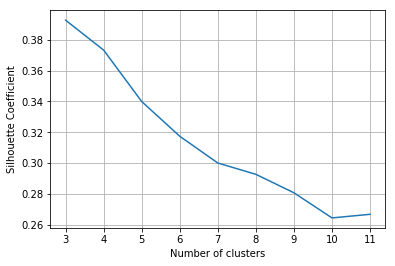

In [44]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')# here it is 5 cluster
plt.grid(True)

### The solution can be 4 or 5 or 6

In [49]:
# Calculate monthly average purchase & cash advance amount.
cc_1 = cc[['BALANCE','PURCHASES','CASH_ADVANCE']]
cc_1.head()

,BALANCE,PURCHASES,CASH_ADVANCE
0,40.900749,95.40,0.000000
1,3202.467416,0.00,6442.945483
2,2495.148862,773.17,0.000000
3,1666.670542,1499.00,205.788017
4,817.714335,16.00,0.000000


In [52]:
# purchase is the purchase amount for 12 months. Each amount divided by 12 gives purchase amount for one month gives Purchase_onemonth
cc_1['PURCHASE_ONEMONTH'] = cc_1.PURCHASES / 12
cc_1.head()
#cash advance amount is the cash advance column

C:\Users\Sony\Anaconda4\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,BALANCE,PURCHASES,CASH_ADVANCE,PUCHASE_ONEMONTH,PURCHASE_ONEMONTH
0,40.900749,95.40,0.000000,7.950000,7.950000
1,3202.467416,0.00,6442.945483,0.000000,0.000000
2,2495.148862,773.17,0.000000,64.430833,64.430833
3,1666.670542,1499.00,205.788017,124.916667,124.916667
4,817.714335,16.00,0.000000,1.333333,1.333333


In [47]:
#purchase by type
cc_2 = cc[['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]
cc_2.head()

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,95.40,0.00,95.4
1,0.00,0.00,0.0
2,773.17,773.17,0.0
3,1499.00,1499.00,0.0
4,16.00,16.00,0.0


In [49]:
#average amount per purchase and cash advance transaction
#avg amt per purchase means the purchase trx(one purchase means one transaction)
cc_3 = cc[['PURCHASES_TRX','CASH_ADVANCE_TRX']]
cc_3.head()

,PURCHASES_TRX,CASH_ADVANCE_TRX
0,2,0
1,0,4
2,12,0
3,1,1
4,1,0


In [62]:
#limit usage
cc_num['limit_usage'] = cc_num.BALANCE / cc_num.CREDIT_LIMIT
cc_num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_3,cluster_4,cluster_5,limit_usage,PAY_MINPAY
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12.0,0,1,1,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12.0,1,3,3,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12.0,0,1,1,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,767.303879,0.000000,12.0,0,1,1,0.222223,NaN
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12.0,0,1,1,0.681429,2.771075


In [63]:
#payments to minimum payments ratio
cc_num['PAY_MINPAY'] = cc_num.PAYMENTS / cc_num.MINIMUM_PAYMENTS
cc_num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_3,cluster_4,cluster_5,limit_usage,PAY_MINPAY
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12.0,0,1,1,0.040901,1.446508
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12.0,1,3,3,0.457495,3.826241
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12.0,0,1,1,0.332687,0.991682
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,767.303879,0.000000,12.0,0,1,1,0.222223,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12.0,0,1,1,0.681429,2.771075


### DBSCAN Clustering

In [40]:
# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=2.05, min_samples=10)
db.fit(cc_scaled2)

DBSCAN(algorithm='auto', eps=2.05, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=1, p=None)

In [41]:
pd.Series(db.labels_).value_counts()

 0    8769
-1     171
 1      10
dtype: int64

In [42]:
# review the cluster labels
db.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
# save the cluster labels and sort by cluster
cc_num['DB_cluster'] = db.labels_

In [44]:
# review the cluster centers
cc_num.groupby('DB_cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_3,cluster_4,cluster_5
DB_cluster,,,,,,,,,,,,,,,,,,,,
-1,4293.628855,0.897203,4199.319357,2446.698062,1376.772760,4377.750715,0.693681,0.448458,0.558092,0.357013,11.280702,46.231988,10625.730994,9160.849571,2169.605019,0.197686,11.087719,1.491228,2.409357,3.263158
0,1479.091783,0.877571,863.427433,492.786585,361.950313,869.590940,0.485823,0.196932,0.360069,0.129792,2.922568,13.420136,4342.234297,1489.927231,734.944362,0.152975,11.525145,0.325465,1.257612,1.363439
1,8800.164505,1.000000,8977.290000,6198.834560,3188.996250,245.437182,0.983333,0.841667,0.883333,0.025000,0.300000,106.806000,15200.000000,13063.509206,5164.014675,0.050000,12.000000,2.000000,2.000000,4.000000
